# Medi_link Recommendation System:

# From symptoms predicting Disease, giving Description about it, Predicting Precautions, Medicines, Diet, Workout.

Regards,
**Om Gadekar**

# load dataset

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('/content/drive/MyDrive/ML codes git/Medicine-Recommendation-System-Personalized-Medical-Recommendation-System-with-Machine-Learning-main/Training.csv')

In [4]:
df.shape

(4920, 133)

In [5]:
print(df.columns.tolist())

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

In [6]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [7]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [8]:
# diseases:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [9]:
# there are many diseases which are coming repeatedly but unique are 41
len(df['prognosis'].unique())

41

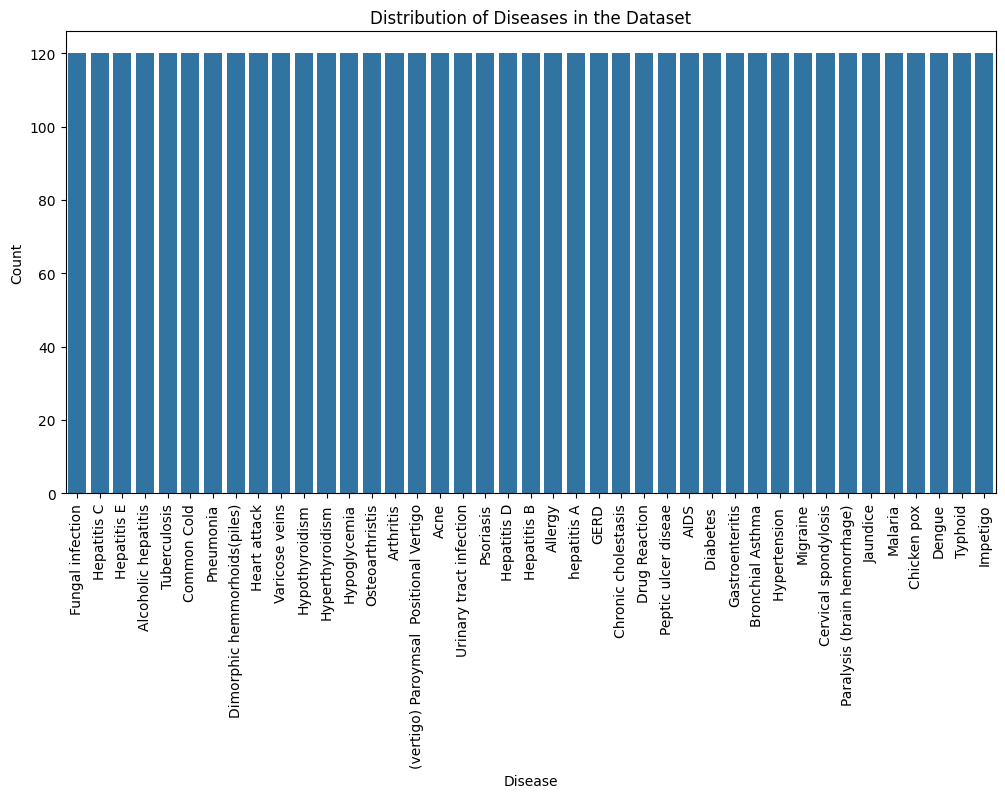

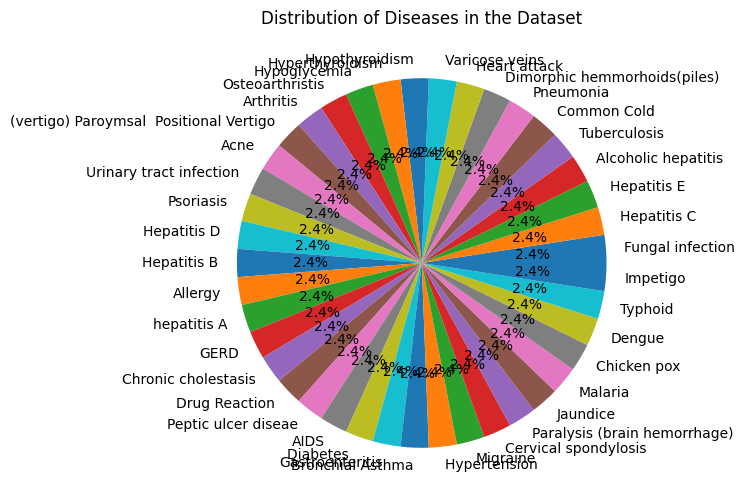

In [10]:
# prompt: give me visualization on above dataset

import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts of each disease
disease_counts = df['prognosis'].value_counts()

# Create a bar chart of the disease counts
plt.figure(figsize=(12, 6))
sns.barplot(x=disease_counts.index, y=disease_counts.values)
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Distribution of Diseases in the Dataset')
plt.xticks(rotation=90)
plt.show()

# Create a pie chart of the disease counts
plt.figure(figsize=(12, 6))
plt.pie(disease_counts.values, labels=disease_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Diseases in the Dataset')
plt.show()


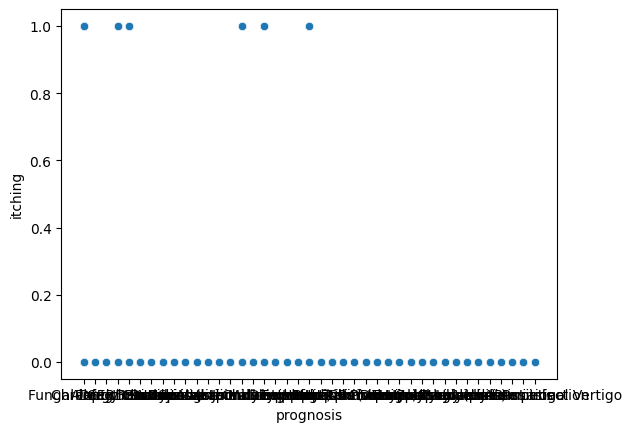

In [11]:
# prompt: scatter plot for above data

import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="prognosis", y="itching")
plt.show()


# Train_Test_Split:

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [13]:
X = df.drop('prognosis',axis=1)
y = df['prognosis']

In [14]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [15]:
y

,prognosis
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection
...,...
4915,(vertigo) Paroymsal Positional Vertigo
4916,Acne
4917,Urinary tract infection
4918,Psoriasis


In [16]:
# Train test split 70--30 with 4 variables:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state=20)

In [17]:
# data alloted under all 4 values:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3444, 132), (1476, 132), (3444,), (1476,))

In [18]:
y

,prognosis
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection
...,...
4915,(vertigo) Paroymsal Positional Vertigo
4916,Acne
4917,Urinary tract infection
4918,Psoriasis


**y is string & we have to convert it into numpy array & also label encode it:**

In [19]:
# creating object of label encoder
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

Y & y is different now, As Y is convert data into numberical data.

In [20]:
Y

array([15, 15, 15, ..., 38, 35, 27])

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.3, random_state=20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3444, 132), (1476, 132), (3444,), (1476,))

# Training Top 5 Models:

In [22]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


# Create a dictionary to store models
models = {
    'SVC':SVC(kernel = 'linear'),   # 1 & 0 linearly separable
    'Random_Forest':RandomForestClassifier(n_estimators=100,random_state=42), # 100 decision trees, best one choose
    'GradientBoosting':GradientBoostingClassifier(n_estimators=100,random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'NaiveBayes':MultinomialNB()
}
# for loop: for both key value at a time so use 'items':
# Loop through the models, train, test, and print results
for model_name, model in models.items():
  # print(model_name,': ',model) # this only for understand

  # Train model:
  model.fit(X_train,y_train)

  # Test Model:
  predictions = model.predict(X_test)

  # calculate Accuracy
  accuracy = accuracy_score(y_test,predictions)

  # Calculate confusion matrix
  cm = confusion_matrix(y_test,predictions)

  # print with string formatting:
  print(f"{model_name} Accuracy : {accuracy}")
  print(f"{model_name} Confusion_Matrix: ")
  print(np.array2string(cm,separator=', '))

SVC Accuracy : 1.0
SVC Confusion_Matrix: 
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
Random_Forest Accuracy : 1.0
Random_Forest Confusion_Matrix: 
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
GradientBoosting Accuracy : 1.0
GradientBoosting Confusion_Matrix: 
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
KNeighbors Accuracy : 1.0
KNeighbors Confusion_Matrix: 
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0

In [23]:
# prompt: show me all above accuracies

for model_name, model in models.items():
  # Train model:
  model.fit(X_train,y_train)

  # Test Model:
  predictions = model.predict(X_test)

  # calculate Accuracy
  accuracy = accuracy_score(y_test,predictions)

  # print with string formatting:
  print(f"{model_name} Accuracy : {accuracy}")


SVC Accuracy : 1.0
Random_Forest Accuracy : 1.0
GradientBoosting Accuracy : 1.0
KNeighbors Accuracy : 1.0
NaiveBayes Accuracy : 1.0


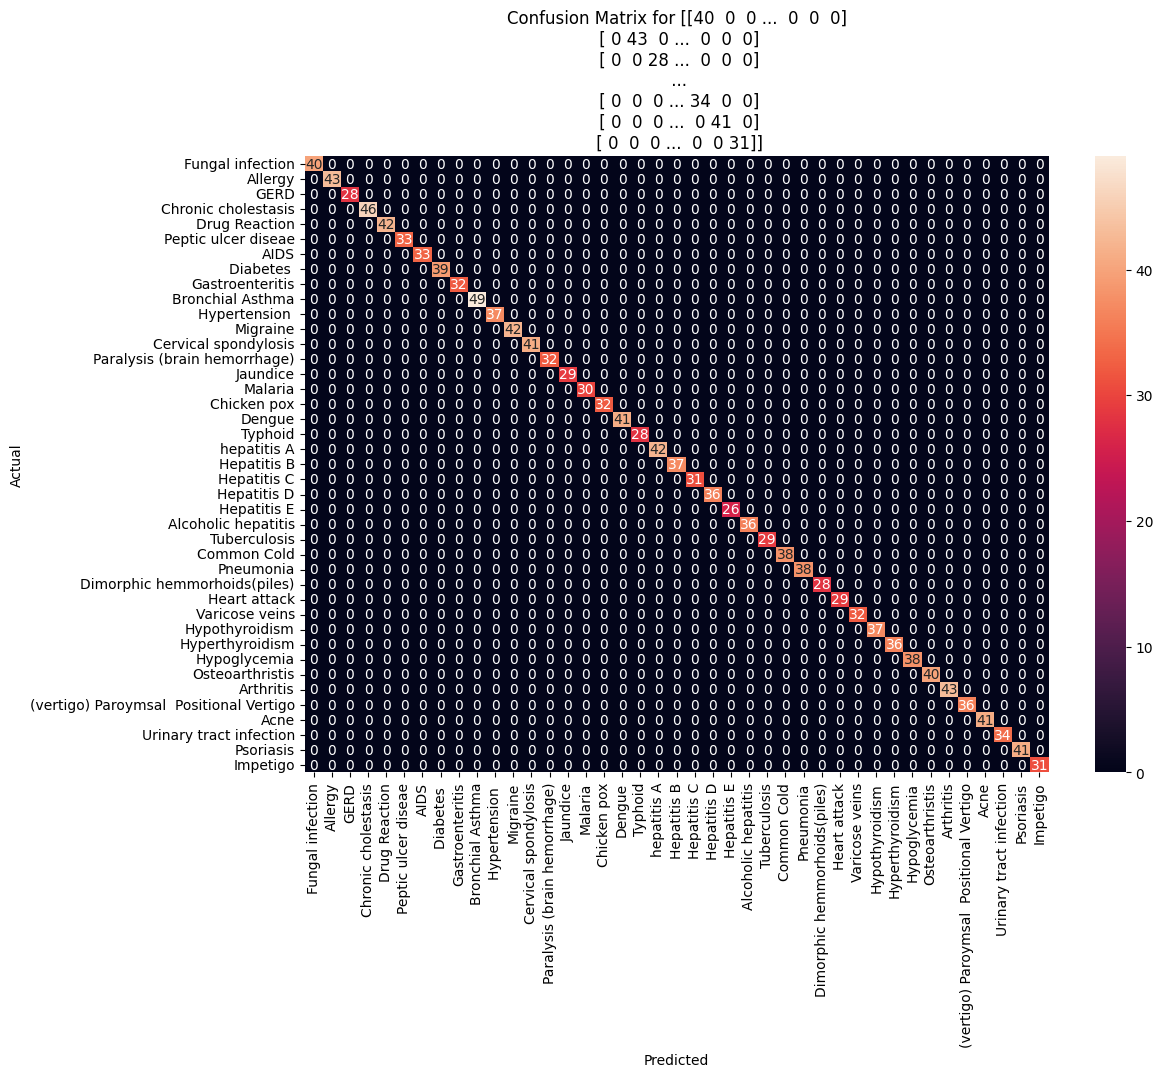

In [24]:
# prompt: give me heat map graph in seaborn for above 1 confusion matrix

import matplotlib.pyplot as plt
# Create a heatmap of the confusion matrix for the first model
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=df['prognosis'].unique(), yticklabels=df['prognosis'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for {}'.format(cm))
plt.show()


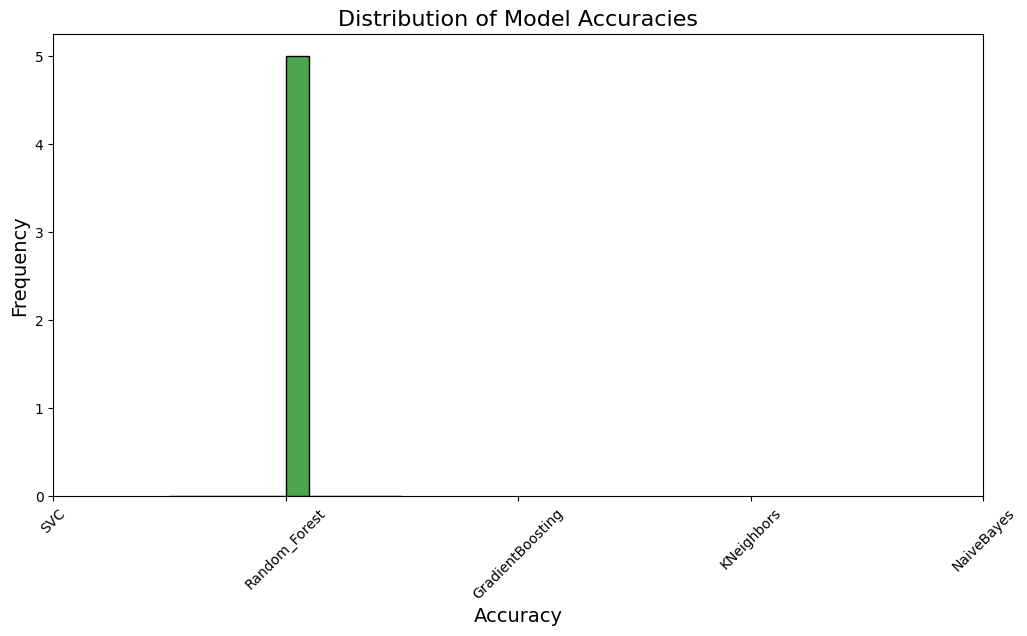

In [25]:
# prompt: give me seaborn  histogram with all labels & attratctive graph for all accuracy we get

import matplotlib.pyplot as plt
import numpy as np
# Create a list of model names and their corresponding accuracies
model_names = list(models.keys())
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models.values()]

# Create a Seaborn histogram with attractive graph for all accuracies
plt.figure(figsize=(12, 6))
sns.histplot(accuracies, bins=10, color='green', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Model Accuracies', fontsize=16)

# Add model names as labels on the x-axis
plt.xticks(ticks=np.arange(len(model_names)), labels=model_names, rotation=45)

# Show the plot
plt.show()


<ipython-input-26-8f58b7738963>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='Set2')


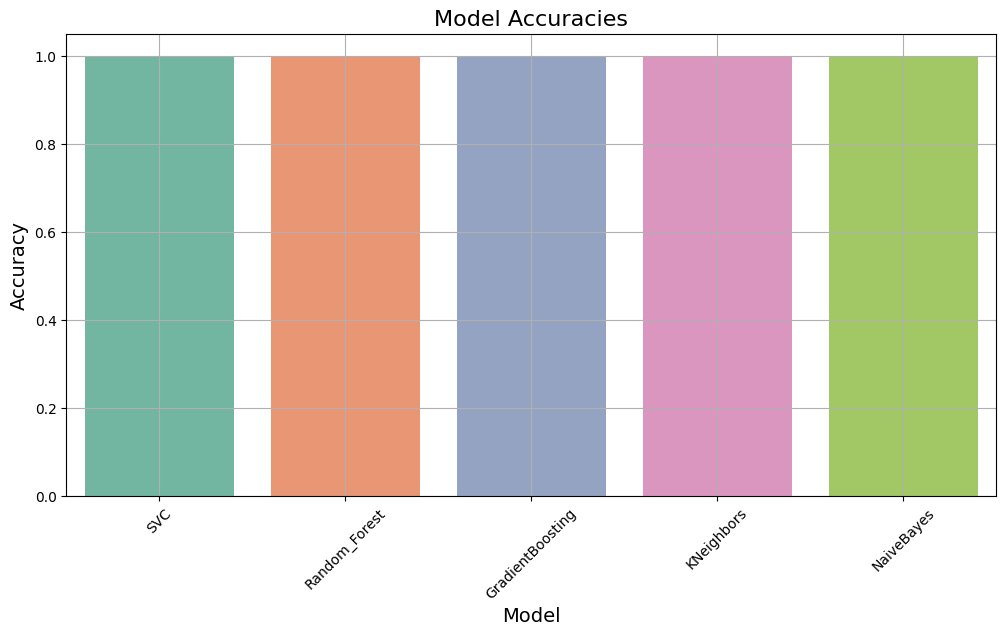

<ipython-input-26-8f58b7738963>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette='Set2', orient='h')


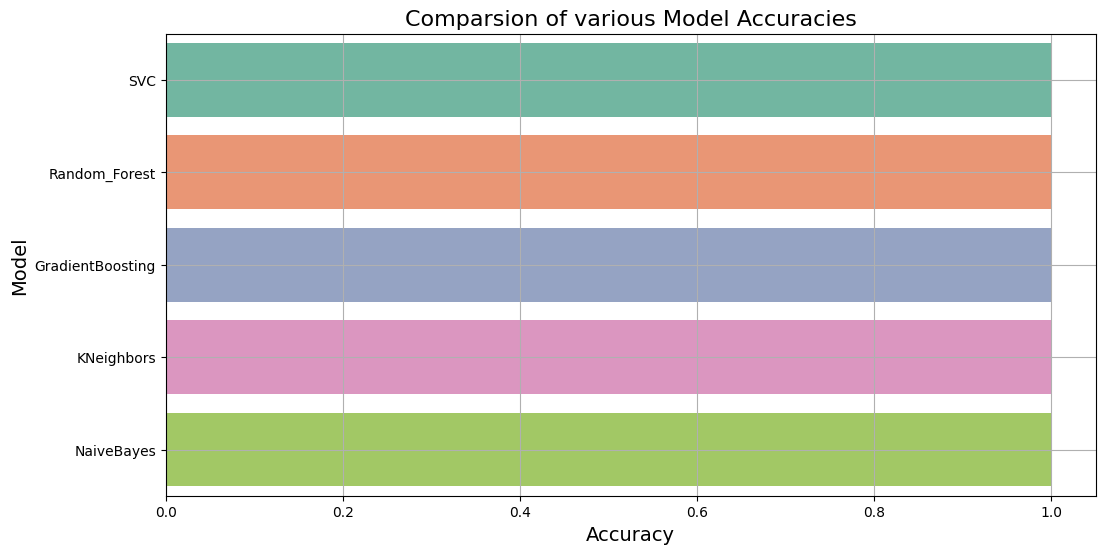

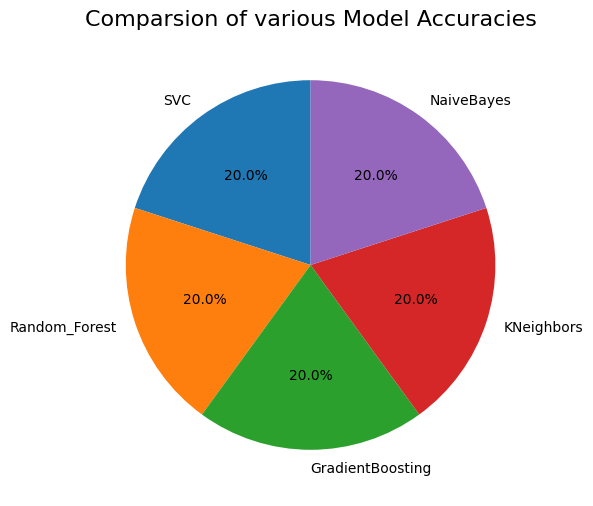

In [26]:
# prompt: give me seaborn  bar graph with all labels & attratctive graph for all accuracy we get: model_names = ['SVC', 'Random_Forest', 'GradientBoosting', 'KNeighbors', 'NaiveBayes']
# accuracies = [1.0, 1.0, 1.0, 1.0, 1.0] give me all graphs which can be bset suitable for this data

import seaborn as sns
import matplotlib.pyplot as plt

# Define model names and accuracies
model_names = ['SVC', 'Random_Forest', 'GradientBoosting', 'KNeighbors', 'NaiveBayes']
accuracies = [1.0, 1.0, 1.0, 1.0, 1.0]

# Create a bar chart with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=accuracies, palette='Set2')

# Add labels and title
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracies', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()


# Create a horizontal bar chart with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=accuracies, y=model_names, palette='Set2', orient='h')

# Add labels and title
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.title('Comparsion of various Model Accuracies', fontsize=16)

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()


# Create a pie chart with seaborn
plt.figure(figsize=(12, 6))
plt.pie(accuracies, labels=model_names, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Comparsion of various Model Accuracies', fontsize=16)

# Show the plot
plt.show()


# Single Prediction:

In [27]:
#SVC:
svc = SVC(kernel = 'linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

**Now we have to store it in model folder**

In [28]:
import joblib
model = svc
joblib.dump(model,'predict.pkl')

['predict.pkl']

In [29]:
from google.colab import files
files.download('predict.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

save the model:

In [30]:
import pickle
pickle.dump(svc,open('/content/drive/MyDrive/ML codes git/Medicine-Recommendation-System-Personalized-Medical-Recommendation-System-with-Machine-Learning-main/models/svc.pkl','wb'))

In [31]:
# load the model:
svc = pickle.load(open('/content/drive/MyDrive/ML codes git/Medicine-Recommendation-System-Personalized-Medical-Recommendation-System-with-Machine-Learning-main/models/svc.pkl','rb'))

In [32]:
X_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
4037,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
432,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1266,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3765,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2327,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1399,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1906,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


for row no 4037 all input data:

In [33]:
X_test.iloc[0].values

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
# above is 1D array we want 2D so we reshape it by(1,-1):
X_test.iloc[0].values.reshape(1,-1)

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [35]:
# SVC predict on above data:
svc.predict(X_test.iloc[0].values.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([40])

In [36]:
# exactly same prediction:
y_test

array([40,  6, 16, ...,  8, 10, 33])

In [37]:
y_test[0]

40

**Test No. 1:**

In [38]:
print('Actual label   : ',svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print('Predicted label: ',y_test[0])

Actual label   :  [40]
Predicted label:  40


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [39]:
# Test No. 2:
print('Actual label   : ',svc.predict(X_test.iloc[10].values.reshape(1,-1)))
print('Predicted label: ',y_test[10])

Actual label   :  [20]
Predicted label:  20


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Recommendation System & prediction:


# load Database & use Logic for recommendations:

In [40]:
sym_des = pd.read_csv('/content/drive/MyDrive/ML codes git/Medicine-Recommendation-System-Personalized-Medical-Recommendation-System-with-Machine-Learning-main/symtoms_df.csv')
sym_des.head(5)

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN


In [41]:
# precautions data is important:
precautions = pd.read_csv('/content/drive/MyDrive/ML codes git/Medicine-Recommendation-System-Personalized-Medical-Recommendation-System-with-Machine-Learning-main/precautions_df.csv')
precautions.head(5)

,Unnamed: 0,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [42]:
# workout data:
workout = pd.read_csv('/content/drive/MyDrive/ML codes git/Medicine-Recommendation-System-Personalized-Medical-Recommendation-System-with-Machine-Learning-main/workout_df.csv')
workout.head(5)

,Unnamed: 0.1,Unnamed: 0,disease,workout
0,0,0,Fungal infection,Avoid sugary foods
1,1,1,Fungal infection,Consume probiotics
2,2,2,Fungal infection,Increase intake of garlic
3,3,3,Fungal infection,Include yogurt in diet
4,4,4,Fungal infection,Limit processed foods


In [43]:
# Load description dataset:
description = pd.read_csv('/content/drive/MyDrive/ML codes git/Medicine-Recommendation-System-Personalized-Medical-Recommendation-System-with-Machine-Learning-main/description.csv')
description.head(5)

,Disease,Description
0,Fungal infection,Fungal infection is a common skin condition ca...
1,Allergy,Allergy is an immune system reaction to a subs...
2,GERD,GERD (Gastroesophageal Reflux Disease) is a di...
3,Chronic cholestasis,Chronic cholestasis is a condition where bile ...
4,Drug Reaction,Drug Reaction occurs when the body reacts adve...


In [44]:
# read medication/medicine/drugs dataset:
medications = pd.read_csv('/content/drive/MyDrive/ML codes git/Medicine-Recommendation-System-Personalized-Medical-Recommendation-System-with-Machine-Learning-main/medications.csv')
medications.head(5)

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."


In [45]:
diets = pd.read_csv('/content/drive/MyDrive/ML codes git/Medicine-Recommendation-System-Personalized-Medical-Recommendation-System-with-Machine-Learning-main/diets.csv')
diets.head(5)

,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."
4,Drug Reaction,"['Antihistamine Diet', 'Omega-3-rich foods', '..."


**but we want to create for all data which we want to show for particluar disease so we make functiuon in upper part where numbers are alloted to all symptoms & diseases.**


In [46]:
# we are creating helper function for prediction:

def helper(dis):
    desc = description[description['Disease'] == dis]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout





# all Symptoms & Diseases are alloted some numbers so predicting number not symptom or disease string:

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}
# creating function that can predict disease.
def get_predicted_value(patient_symptoms):
  input_vector = np.zeros(len(symptoms_dict))
# giving patient symptoms as i/p as 0 or 1 & predicting with comparing
# that 133 sympotms are matching 1 or 0.
  for items in patient_symptoms:
    input_vector[symptoms_dict[items]] = 1
  return diseases_list[svc.predict([input_vector])[0]]

In [47]:
# test 1:
#symptoms = input("Enter Your Symptoms: ")

In [48]:
# Above i/p are stored in symptoms:
#symptoms

**This is string with comma separated, so we have to strip it & firstly split it.**

In [49]:
#[s.strip() for s in symptoms.split(',')]

In [50]:
# prediction based on various symptoms:
# test 1:
symptoms = input("Enter Your Symptoms: ")
user_symptoms = [s.strip() for s in symptoms.split(',')]

user_symptoms = [sym.strip("[]' ") for sym in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)
#predicting disease:
print()
print("Predicted Disease is: ",predicted_disease,"\n")




# calling above helper function after that:
desc,pre,med,die,wrkout = helper(predicted_disease)

#printing description,precautions, diets, medicines & workout for predicted disease:
# Results:
print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1

Enter Your Symptoms: itching

Predicted Disease is:  Fungal infection 

=================predicted disease============
Fungal infection
=================description==================
Fungal infection is a common skin condition caused by fungi.
=================precautions==================
1 :  bath twice
2 :  use detol or neem in bathing water
3 :  keep infected area dry
4 :  use clean cloths
=================medications==================
5 :  ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
=================workout==================
6 :  Avoid sugary foods
7 :  Consume probiotics
8 :  Increase intake of garlic
9 :  Include yogurt in diet
10 :  Limit processed foods
11 :  Stay hydrated
12 :  Consume green tea
13 :  Eat foods rich in zinc
14 :  Include turmeric in diet
15 :  Eat fruits and vegetables
=================diets==================
16 :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


**Creating Actual System:**

In [51]:
'''
# filtering description, precautions with pandas:
descr = description[description['Disease'] == predicted_disease]['Description']
descr = "".join([w for w in descr])
#descr

pre = precautions[precautions['Disease'] == predicted_disease][['Precaution_1', 'Precaution_2',	'Precaution_3', 'Precaution_4']]
pre = [col for col in pre.values]
#pre

# but we want to create for all data which we want to show for particluar disease so we make function in upper part
# where numbers are alloted to all symptoms & diseases.
'''

'\n# filtering description, precautions with pandas:\ndescr = description[description[\'Disease\'] == predicted_disease][\'Description\']\ndescr = "".join([w for w in descr])\n#descr\n\npre = precautions[precautions[\'Disease\'] == predicted_disease][[\'Precaution_1\', \'Precaution_2\',\t\'Precaution_3\', \'Precaution_4\']]\npre = [col for col in pre.values]\n#pre\n\n# but we want to create for all data which we want to show for particluar disease so we make function in upper part\n# where numbers are alloted to all symptoms & diseases.\n'

**import sklearn for version checking where we train our model**

In [52]:
import sklearn
print(sklearn.__version__)

1.6.0


In [53]:
print("model completed")

model completed


# Thank You

Regards,
**OM GADEKAR**